In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('World Energy Consumption.csv')
df.head()

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Pulling all rows with no iso code to separate out continents and countries
df[df['iso_code'].isna()].country.unique()

array(['Africa', 'Asia Pacific', 'CIS', 'Central America',
       'Czechoslovakia', 'Eastern Africa', 'Europe', 'Europe (other)',
       'Falkland Islands ', 'Middle Africa', 'Middle East',
       'North America', 'OPEC', 'Other Asia & Pacific', 'Other CIS',
       'Other Caribbean', 'Other Middle East', 'Other Northern Africa',
       'Other South America', 'Other Southern Africa', 'Reunion',
       'South & Central America', 'USSR', 'United States Pacific Islands',
       'Western Africa', 'Yugoslavia'], dtype=object)

In [4]:
#Updating iso codes of indivudual countries so they are not included in the calculations for continents
df.loc[df.country == "Czechoslovakia", "iso_code"] = "CZV"
df.loc[df.country == "Falkland Islands ", "iso_code"] = "FKI"
df.loc[df.country == "Reunion", "iso_code"] = "REU"
df.loc[df.country == "USSR", "iso_code"] = "USR"
df.loc[df.country == "Yugoslavia", "iso_code"] = "YUG"

df[df['iso_code'].isna()].country.unique()

array(['Africa', 'Asia Pacific', 'CIS', 'Central America',
       'Eastern Africa', 'Europe', 'Europe (other)', 'Middle Africa',
       'Middle East', 'North America', 'OPEC', 'Other Asia & Pacific',
       'Other CIS', 'Other Caribbean', 'Other Middle East',
       'Other Northern Africa', 'Other South America',
       'Other Southern Africa', 'South & Central America',
       'United States Pacific Islands', 'Western Africa'], dtype=object)

In [5]:
df['total_renewables_consumption'] = df['renewables_consumption'] + df['other_renewable_consumption']

In [6]:
#Individual countries
country = df[df['iso_code'].notnull()]
country['iso_code'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'CZV', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FRO', 'FKI', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP',
       'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG',
       'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX',
       'MDA', '

In [7]:
#dropping the "World" from the country list
country = country.loc[country['iso_code'] != 'OWID_WRL'].reset_index(drop = True)
country['iso_code'].unique()

array(['AFG', 'ALB', 'DZA', 'ASM', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'CZV', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FRO', 'FKI', 'FJI', 'FIN', 'FRA', 'GUF', 'PYF', 'GAB',
       'GMB', 'GEO', 'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP',
       'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN',
       'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JAM',
       'JPN', 'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO',
       'LVA', 'LBN', 'LSO', 'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG',
       'MWI', 'MYS', 'MDV', 'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX',
       'MDA', '

In [8]:
#Grouped countries and continents
filter_list = ['Africa', 'Asia Pacific', 'Australia', 'Europe', 'North America', 'South & Central America']
cont = df[df.country.isin(filter_list)].reset_index(drop = True)
cont = cont.drop('iso_code', axis = 1)
cont.head()

,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,total_renewables_consumption
0,Africa,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa,1901,67.810,4.530,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Africa,1902,49.068,5.500,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Africa,1903,35.697,5.965,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Africa,1904,12.880,2.921,NaN,0.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns = cont.columns
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(cont[item].isnull().sum()))

Number of NaN's for  country - 0
Number of NaN's for  year - 0
Number of NaN's for  coal_prod_change_pct - 39
Number of NaN's for  coal_prod_change_twh - 107
Number of NaN's for  gas_prod_change_pct - 147
Number of NaN's for  gas_prod_change_twh - 41
Number of NaN's for  oil_prod_change_pct - 82
Number of NaN's for  oil_prod_change_twh - 7
Number of NaN's for  energy_cons_change_pct - 267
Number of NaN's for  energy_cons_change_twh - 267
Number of NaN's for  biofuel_share_elec - 570
Number of NaN's for  biofuel_elec_per_capita - 570
Number of NaN's for  biofuel_cons_change_pct - 508
Number of NaN's for  biofuel_share_energy - 371
Number of NaN's for  biofuel_cons_change_twh - 375
Number of NaN's for  biofuel_consumption - 371
Number of NaN's for  biofuel_cons_per_capita - 371
Number of NaN's for  carbon_intensity_elec - 591
Number of NaN's for  coal_share_elec - 380
Number of NaN's for  coal_cons_change_pct - 375
Number of NaN's for  coal_share_energy - 371
Number of NaN's for  coal_co

In [10]:
world = df.loc[df['iso_code'] == 'OWID_WRL'].reset_index(drop = True)
world = world.drop('iso_code', axis = 1)
world.head()

,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,total_renewables_consumption
0,World,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,World,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,World,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Countries Exploration

In [11]:
country.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,total_renewables_consumption
count,15852.000000,6641.000000,9572.000000,4.053000e+03,6948.000000,5548.000000,7541.000000,8710.00000,8760.000000,4185.000000,...,4070.000000,1.038700e+04,5375.000000,1399.00000,4064.000000,3991.000000,4070.000000,5358.000000,4070.000000,4070.000000
mean,1972.675309,22.824019,3.830912,2.305189e+14,5.652883,20.136083,6.775468,inf,12.902771,1.549108,...,29.013795,2.777112e+11,1.068001,260.47835,0.344072,0.876496,5.925530,52.447194,132.682458,101.216828
std,34.641919,738.020469,75.413433,1.467556e+16,42.907761,363.307237,79.581780,NaN,120.022294,3.553290,...,128.454939,1.013239e+12,3.874953,6510.86803,1.360302,6.462871,41.987352,209.841638,518.554375,287.474631
min,1900.000000,-100.000000,-1560.064000,-1.000000e+02,-752.633000,-100.000000,-1929.339000,-92.63200,-6083.407000,0.000000,...,0.000000,1.963080e+08,0.000000,-100.00000,0.000000,-10.409000,0.000000,0.000000,0.000000,0.000000
25%,1945.000000,-1.324000,0.000000,0.000000e+00,0.000000,-1.482750,0.000000,-0.66125,-0.067250,0.000000,...,0.000000,1.248953e+10,0.000000,0.95650,0.000000,0.000000,0.000000,0.000000,0.000000,2.293250
50%,1983.000000,0.000000,0.000000,2.033000e+00,0.000000,0.000000,0.000000,2.41800,0.448500,0.018000,...,0.000000,4.203563e+10,0.000000,19.16400,0.000000,0.000000,0.000000,0.000000,0.000000,16.018500
75%,2002.000000,7.937000,0.204000,1.000000e+01,0.976000,9.375500,1.475000,7.07900,7.174250,1.349000,...,0.248000,1.700000e+11,0.098000,51.33350,0.014250,0.005000,0.093000,2.238750,3.240750,78.350250
max,2020.000000,44965.754000,2167.820000,9.342930e+17,1189.511000,25500.000000,1134.436000,inf,2686.251000,33.912000,...,1763.675000,1.720000e+13,56.338000,242384.84300,20.660000,155.786000,1004.602000,2825.425000,6928.363000,5239.611000


In [12]:
country[(country['iso_code']=='CHN') & (country['year'] == 2009)]['fossil_share_energy']

3169    92.822
Name: fossil_share_energy, dtype: float64

In [13]:
country[(country['iso_code']=='CHN') & (country['year'] == 2019)]['fossil_share_energy']

3179    85.142
Name: fossil_share_energy, dtype: float64

In [14]:
#Number of countries with at least 5% of energy from low carbon sources in 1989
print (country[(country['year'] == 1989) & (country['low_carbon_share_energy'] >= 5.00)]['country'].count())
#Number of countries with at least 5% of energy from low carbon sources in 2019
print (country[(country['year'] == 2019) & (country['low_carbon_share_energy'] >= 5.00)]['country'].count())
#Number of countries
print (country[(country['year'] == 2019)]['country'].count())

44
57
210


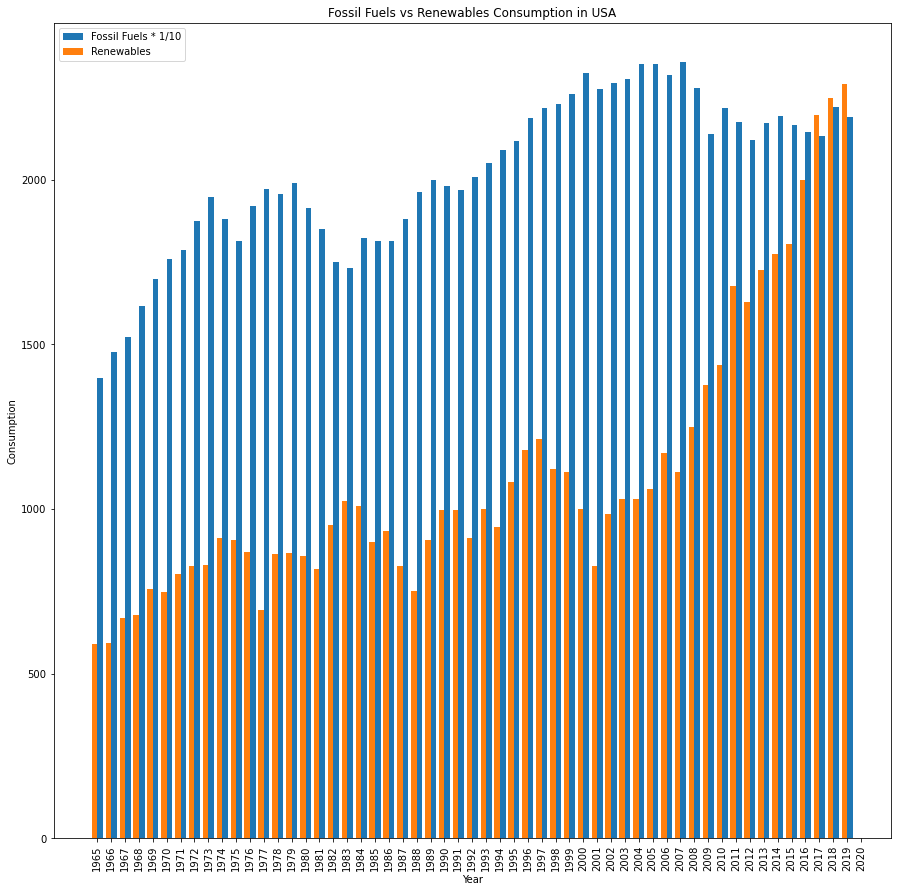

In [15]:
USA = country[country['iso_code'] == 'USA']

X = USA[USA['year'] >= 1965].year
Fossil = (USA[USA['year'] >= 1965].fossil_fuel_consumption)/10
Renew = USA[USA['year'] >= 1965].renewables_consumption
plt.figure(figsize=(15,15))
plt.bar(X + .2, Fossil, 0.4, label = 'Fossil Fuels * 1/10')
plt.bar(X - .2, Renew, 0.4, label = 'Renewables')
plt.xticks(X, rotation = 90)
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.title("Fossil Fuels vs Renewables Consumption in USA")
plt.legend()
plt.show()

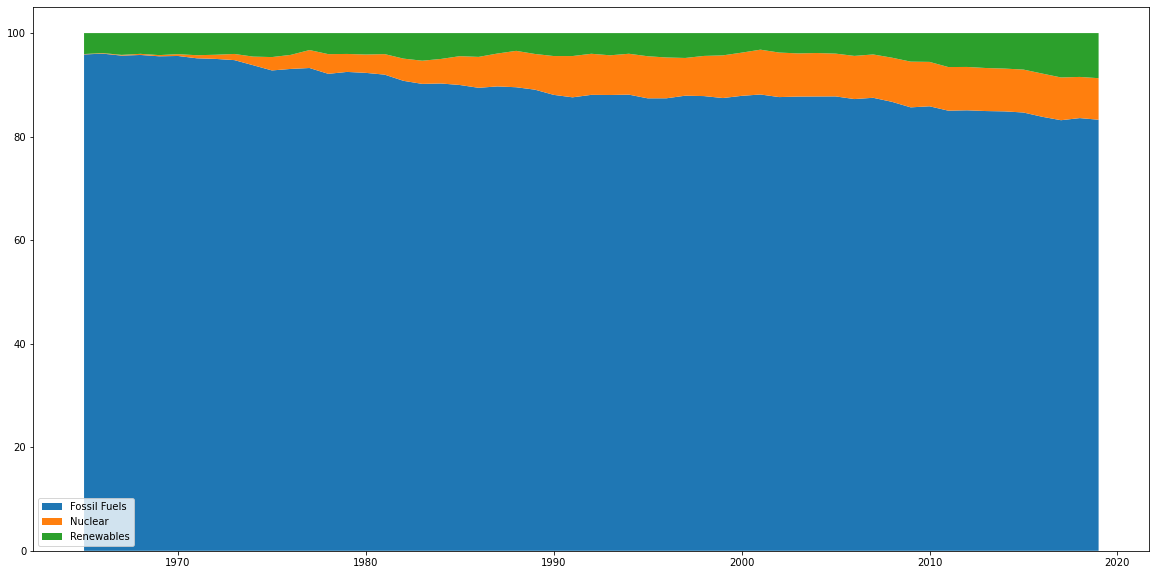

In [16]:
# Primary Energy stacked area chart.
X = USA.year
Fossil = USA.fossil_share_energy
Renew = USA.renewables_share_energy
Nuclear = USA.nuclear_share_energy

plt.figure(figsize=(20,10))
plt.stackplot(X, Fossil, Nuclear, Renew, labels=['Fossil Fuels', 'Nuclear', 'Renewables'])
plt.legend(loc='lower left')

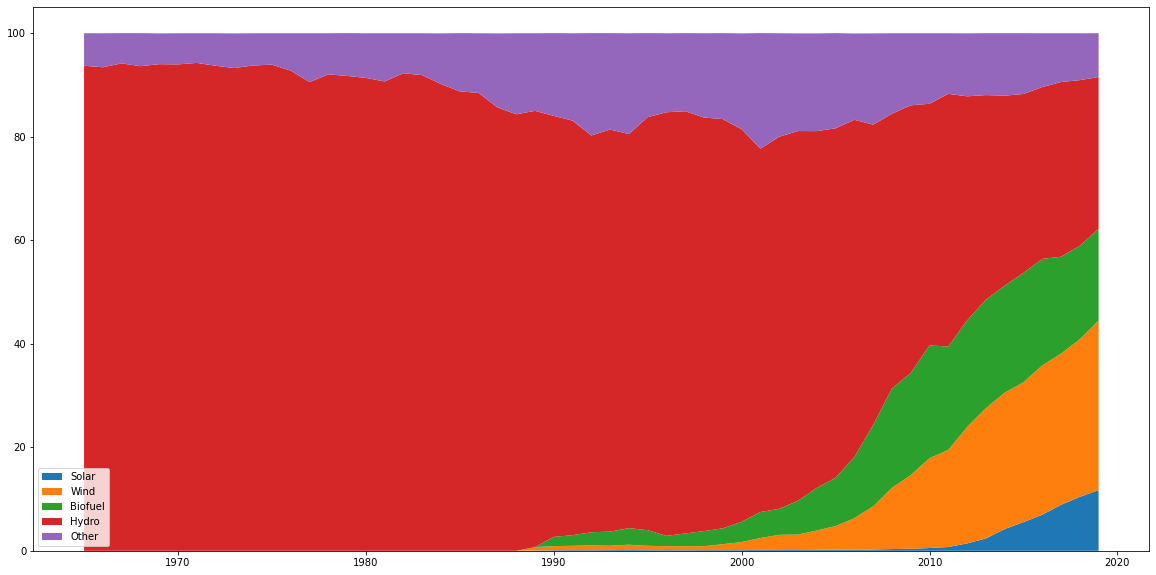

In [17]:
# Renewables stacked area chart.
X = USA.year
Solar = ((USA.solar_share_energy)/(USA.renewables_share_energy))*100
Wind = ((USA.wind_share_energy)/(USA.renewables_share_energy))*100
Biofuel = ((USA.biofuel_share_energy)/(USA.renewables_share_energy))*100
Hydro = ((USA.hydro_share_energy)/(USA.renewables_share_energy))*100
Other = ((USA.other_renewables_share_energy)/(USA.renewables_share_energy))*100

plt.figure(figsize=(20,10))
plt.stackplot(X, Solar, Wind, Biofuel, Hydro, Other, labels=['Solar', 'Wind', 'Biofuel', 'Hydro', 'Other'])
plt.legend(loc='lower left')

In [18]:
print (USA[(USA['year'] == 2019)]['low_carbon_share_energy'])

15001    16.737
Name: low_carbon_share_energy, dtype: float64


In [19]:
features = ['gdp',
                   'population',
                   'biofuel_consumption', 
                   'coal_consumption', 
                   'hydro_consumption', 
                   'gas_consumption', 
                   'nuclear_consumption',
                   'oil_consumption',
                   'other_renewable_consumption',
                   'solar_consumption',
                   'wind_consumption'
                          ]
features = country[(country['year'] == 2016)][features]

#Checking number of NaN's per column
columns = features.columns
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(features[item].isnull().sum()))
    
features.shape

Number of NaN's for  gdp - 55
Number of NaN's for  population - 6
Number of NaN's for  biofuel_consumption - 106
Number of NaN's for  coal_consumption - 140
Number of NaN's for  hydro_consumption - 140
Number of NaN's for  gas_consumption - 140
Number of NaN's for  nuclear_consumption - 140
Number of NaN's for  oil_consumption - 140
Number of NaN's for  other_renewable_consumption - 140
Number of NaN's for  solar_consumption - 140
Number of NaN's for  wind_consumption - 140


(219, 11)

In [20]:
features = features.dropna()

In [21]:
for item in columns:
    print("Number of NaN's for ", item, "- {}".format(features[item].isnull().sum()))
    
features.shape

Number of NaN's for  gdp - 0
Number of NaN's for  population - 0
Number of NaN's for  biofuel_consumption - 0
Number of NaN's for  coal_consumption - 0
Number of NaN's for  hydro_consumption - 0
Number of NaN's for  gas_consumption - 0
Number of NaN's for  nuclear_consumption - 0
Number of NaN's for  oil_consumption - 0
Number of NaN's for  other_renewable_consumption - 0
Number of NaN's for  solar_consumption - 0
Number of NaN's for  wind_consumption - 0


(79, 11)

In [22]:
x = features.values
correlation_matrix = np.corrcoef(x.T)
print(correlation_matrix)

[[1.         0.76046864 0.65776305 0.79136309 0.75056438 0.76566655
  0.74959402 0.96633417 0.85539663 0.87769241 0.94218111]
 [0.76046864 1.         0.18762665 0.83625609 0.72419788 0.31328441
  0.27784975 0.61729211 0.55615232 0.58351925 0.65155326]
 [0.65776305 0.18762665 1.         0.18136761 0.32588164 0.74003042
  0.7927993  0.75391136 0.75910838 0.49847225 0.66558004]
 [0.79136309 0.83625609 0.18136761 1.         0.89044003 0.34773897
  0.33869883 0.67168873 0.57473076 0.72353996 0.78919707]
 [0.75056438 0.72419788 0.32588164 0.89044003 1.         0.40490616
  0.37803555 0.66177875 0.63342006 0.6483568  0.76833829]
 [0.76566655 0.31328441 0.74003042 0.34773897 0.40490616 1.
  0.82920141 0.85629666 0.63057032 0.60477653 0.68432634]
 [0.74959402 0.27784975 0.7927993  0.33869883 0.37803555 0.82920141
  1.         0.82030611 0.65827389 0.6108358  0.73236721]
 [0.96633417 0.61729211 0.75391136 0.67168873 0.66177875 0.85629666
  0.82030611 1.         0.82303386 0.8274196  0.90979584]


Text(0.5, 1.0, 'Correlation between GDP, Population, and Energy Consumption')

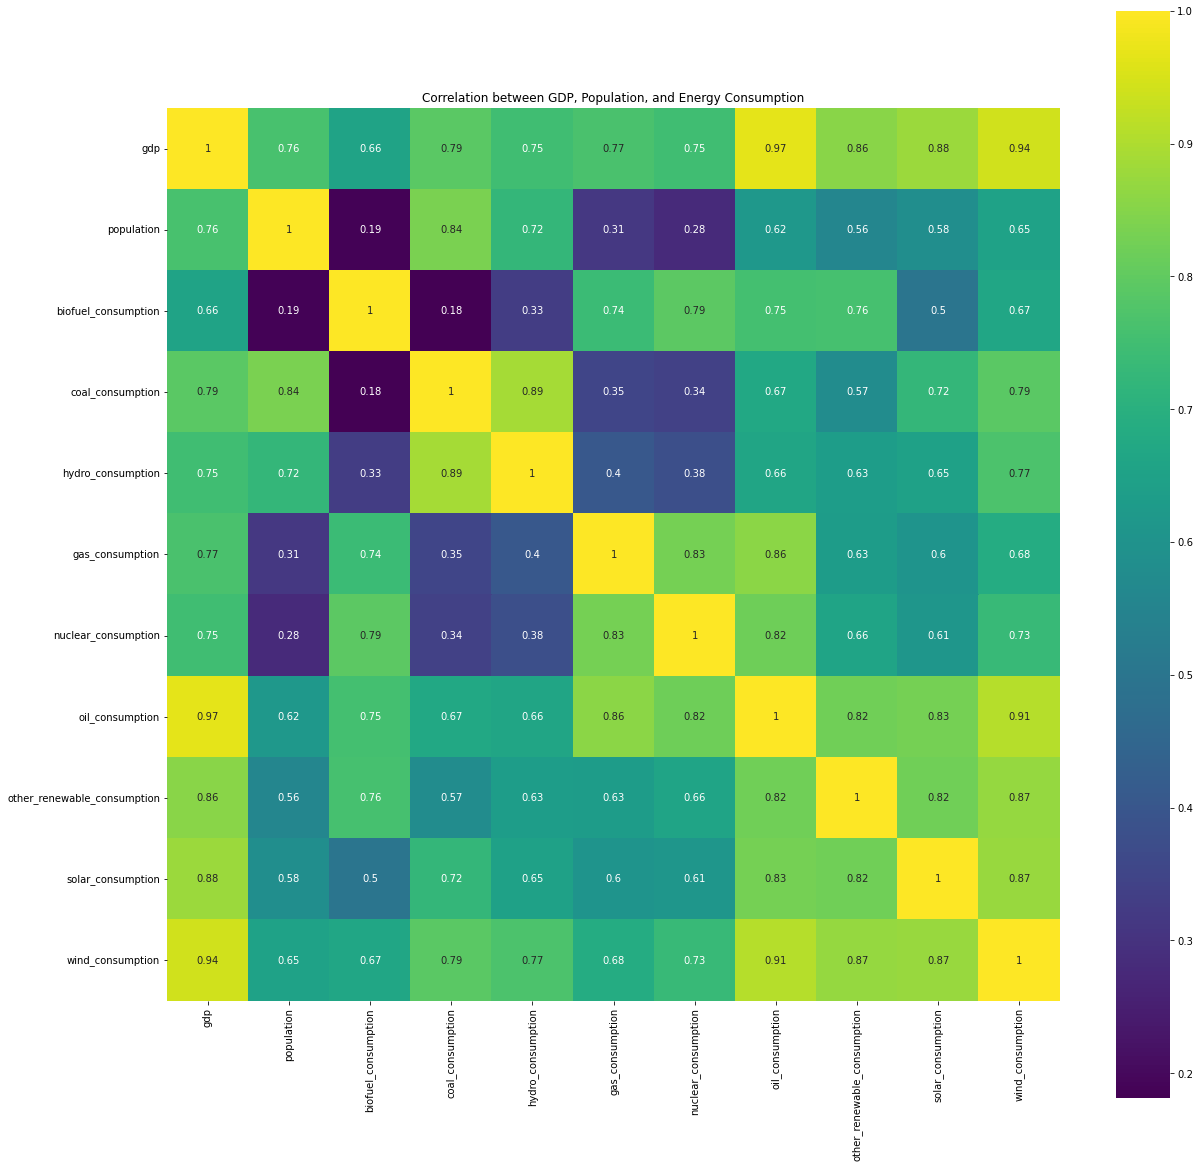

In [23]:
correlation = features.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between GDP, Population, and Energy Consumption')

## Continents Exploration

In [24]:
cont.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,total_renewables_consumption
count,591.000000,552.000000,484.000000,444.000000,550.000000,509.000000,584.000000,324.000000,324.000000,21.000000,...,220.000000,1.170000e+02,211.000000,129.000000,220.000000,216.000000,220.000000,141.000000,220.000000,220.000000
mean,1965.651438,3.334692,69.665671,120.420065,43.317224,9.665980,41.599579,2.953639,327.984790,1.276571,...,63.721195,2.856711e+11,1.261654,919.081729,0.388041,9.784431,75.427468,131.336511,206.482895,1091.075891
std,34.473379,15.539701,390.602008,2375.334135,108.491820,52.422919,167.364657,3.124424,670.872357,0.406474,...,205.980227,2.989982e+11,2.205886,9984.863783,0.850595,24.523543,203.057460,228.451975,465.046598,1137.909354
min,1900.000000,-37.508000,-1535.548000,-12.362000,-495.680000,-70.000000,-940.524000,-5.904000,-1516.635000,0.570000,...,0.000000,2.184402e+10,0.000000,-58.927000,0.000000,-0.788000,0.000000,0.000000,0.000000,21.981000
25%,1936.500000,-0.655250,-7.571000,1.377500,0.000000,-1.286000,-2.558500,0.823500,24.827250,0.876000,...,0.000000,6.272263e+10,0.006000,10.872000,0.000000,0.000000,0.000000,0.408000,0.000000,97.039250
50%,1970.000000,1.925500,9.902500,4.812500,10.044500,2.326000,3.437000,2.726500,115.924000,1.369000,...,0.061500,1.460000e+11,0.141000,20.951000,0.002000,0.022000,0.053000,10.560000,0.562500,658.835500
75%,1995.000000,6.274500,108.232000,9.189750,62.070000,8.440000,83.436000,4.813750,502.600000,1.515000,...,6.007750,4.150000e+11,1.557000,48.844000,0.204250,3.236500,17.435750,165.464000,78.046250,1916.447500
max,2020.000000,255.111000,2701.427000,50058.064000,900.473000,833.333000,1311.773000,19.582000,3879.703000,2.002000,...,1763.675000,1.070000e+12,11.559000,113442.760000,4.909000,147.748000,1142.992000,968.008000,2396.999000,4385.119000


/home/kim/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1080x1080 with 0 Axes>

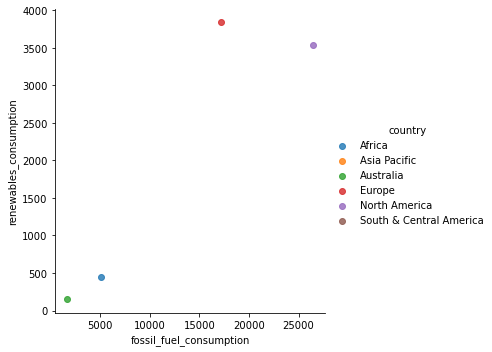

In [25]:
cont2019 = cont[cont['year'] == 2019]
plt.figure(figsize=(15,15))
sns.lmplot('fossil_fuel_consumption', 'renewables_consumption', data=cont2019, hue='country', fit_reg=False)

plt.show()

In [26]:
cont2019.head()

,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,total_renewables_consumption
119,Africa,2019,-2.561,-48.591,0.715,16.881,1.141,52.284,2.461,132.586,...,36.683,NaN,2.012,22.087,0.785,7.843,43.354,13.385,33.143,461.522
174,Asia Pacific,2019,3.951,1316.659,6.342,400.870,0.208,8.728,3.292,2280.099,...,NaN,NaN,4.052,NaN,NaN,NaN,NaN,NaN,NaN,NaN
294,Australia,2019,0.668,24.229,17.956,233.612,36.026,63.419,6.900,114.914,...,1763.675,NaN,8.334,18.529,2.715,7.558,48.347,838.900,1918.297,161.385
415,Europe,2019,-10.512,-212.725,-6.104,-153.335,-3.287,-62.276,-1.109,-261.177,...,512.566,NaN,11.559,14.179,4.909,141.942,1142.992,617.771,1529.735,4385.119
535,North America,2019,-6.962,-325.909,7.417,778.872,7.129,862.639,-1.021,-333.937,...,845.077,NaN,6.541,9.912,2.713,79.247,878.742,968.008,2396.999,3776.509


## World Exploration

In [27]:
world.describe()

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,...,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,total_renewables_consumption
count,121.000000,38.000000,38.000000,49.000000,49.000000,54.000000,54.000000,54.000000,54.000000,21.000000,...,55.000000,6.900000e+01,36.000000,41.000000,55.000000,54.000000,55.000000,36.000000,55.000000,55.000000
mean,1960.000000,2.103368,660.189842,2.934939,614.946633,2.027593,627.194370,2.495981,2202.718074,1.558429,...,17.959182,4.029420e+13,1.335556,49.497927,0.296909,65.556481,442.069291,42.037167,60.616291,8153.013745
std,35.073732,3.066856,1077.720830,2.062847,488.365281,3.601540,1101.998714,1.936557,1555.812861,0.457692,...,47.840500,2.816477e+13,1.810256,106.945136,0.560858,113.731638,876.246607,59.786386,116.418061,4490.417502
min,1900.000000,-5.181000,-2326.870000,-3.117000,-944.242000,-5.763000,-2068.395000,-1.512000,-2058.968000,0.971000,...,0.000000,3.980000e+12,0.001000,0.000000,0.000000,0.000000,0.000000,0.013000,0.000000,2664.359000
25%,1930.000000,-0.023000,-10.147000,1.652000,339.314000,0.036500,11.899500,1.038250,1124.952750,1.155000,...,0.000000,1.680000e+13,0.052500,17.689000,0.000000,0.008000,0.012500,1.198750,0.003000,4844.253000
50%,1960.000000,1.836000,571.174000,2.687000,576.273000,1.416500,522.444500,2.196500,2244.215000,1.523000,...,0.259000,3.350000e+13,0.370500,26.385000,0.014000,2.704500,13.148000,9.248000,2.391000,6984.835000
75%,1990.000000,4.337250,1160.790000,3.941000,851.728000,4.263500,1509.075500,3.644750,3335.063750,1.969000,...,2.011000,5.400000e+13,2.142250,37.086000,0.246500,71.112750,317.552500,65.572750,48.207000,9979.532500
max,2020.000000,8.663000,3060.593000,8.559000,2112.975000,9.998000,2790.614000,6.759000,6446.809000,2.268000,...,232.450000,1.070000e+14,6.152000,699.137000,2.183000,428.736000,3540.051000,204.006000,458.944000,20118.178000


In [28]:
world.head()

,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,...,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,total_renewables_consumption
0,World,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,World,1901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,World,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,World,1903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,World,1904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


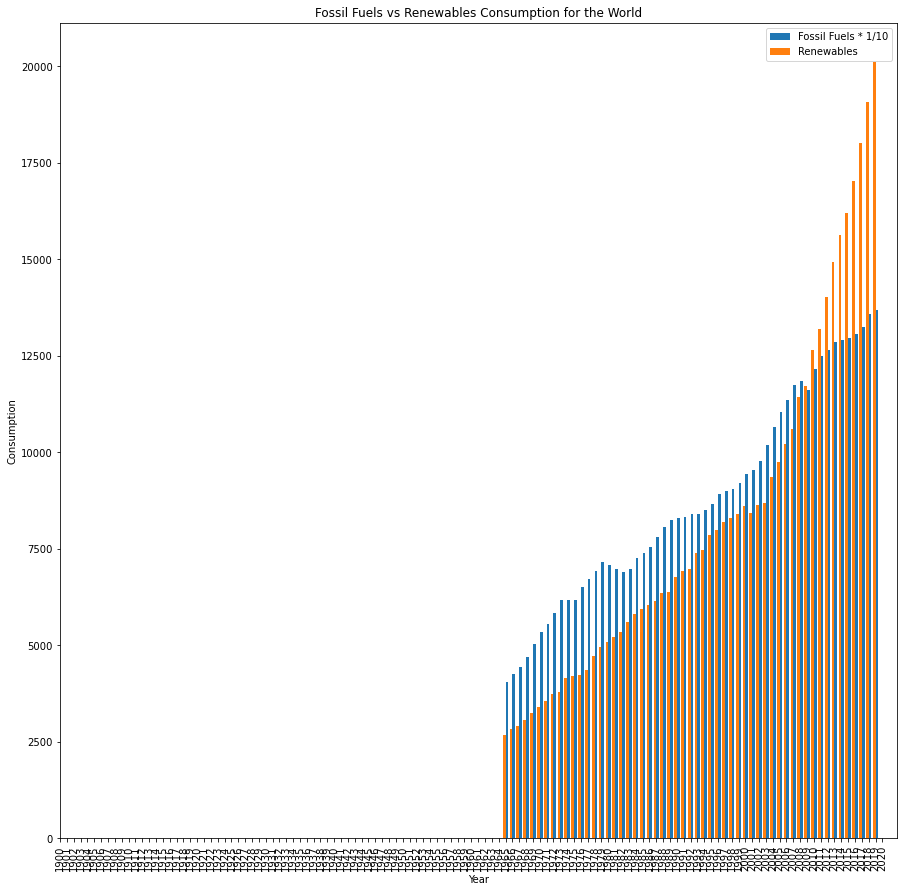

In [29]:
X = world.year
Fossil = (world.fossil_fuel_consumption)/10
Renew = world.total_renewables_consumption
plt.figure(figsize=(15,15))
plt.bar(X + .2, Fossil, 0.4, label = 'Fossil Fuels * 1/10')
plt.bar(X - .2, Renew, 0.4, label = 'Renewables')
plt.xticks(X, rotation = 90)
plt.xlabel("Year")
plt.ylabel("Consumption")
plt.title("Fossil Fuels vs Renewables Consumption for the World")
plt.legend()
plt.show()

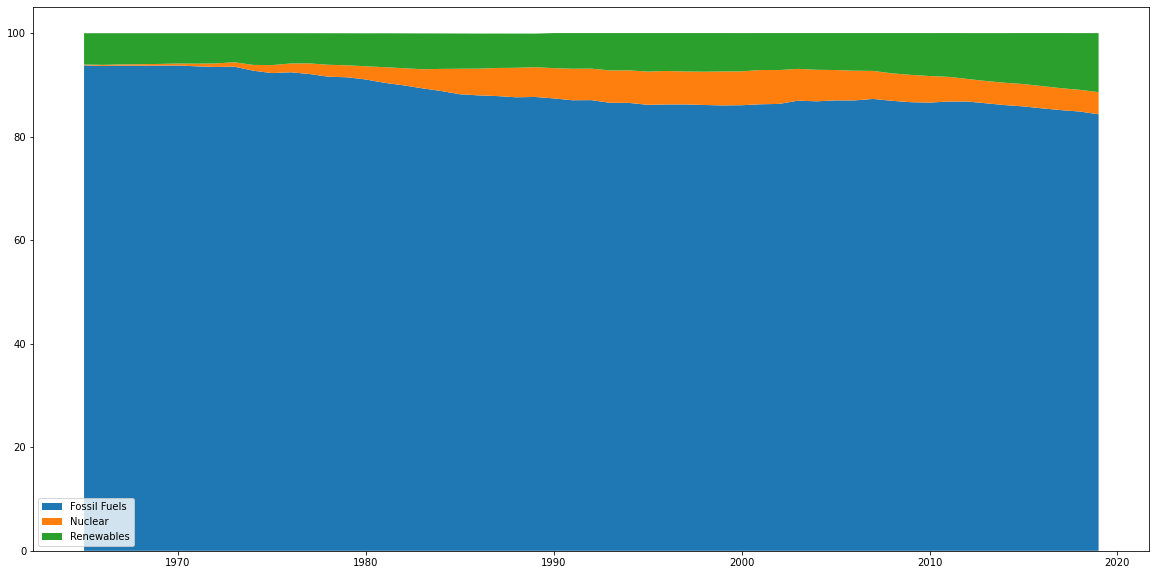

In [30]:
# Primary Energy by Type
X = world.year
Fossil = world.fossil_share_energy
Renew = world.renewables_share_energy
Nuclear = world.nuclear_share_energy

plt.figure(figsize=(20,10))
plt.stackplot(X, Fossil, Nuclear, Renew, labels=['Fossil Fuels', 'Nuclear', 'Renewables'])
plt.legend(loc='lower left')

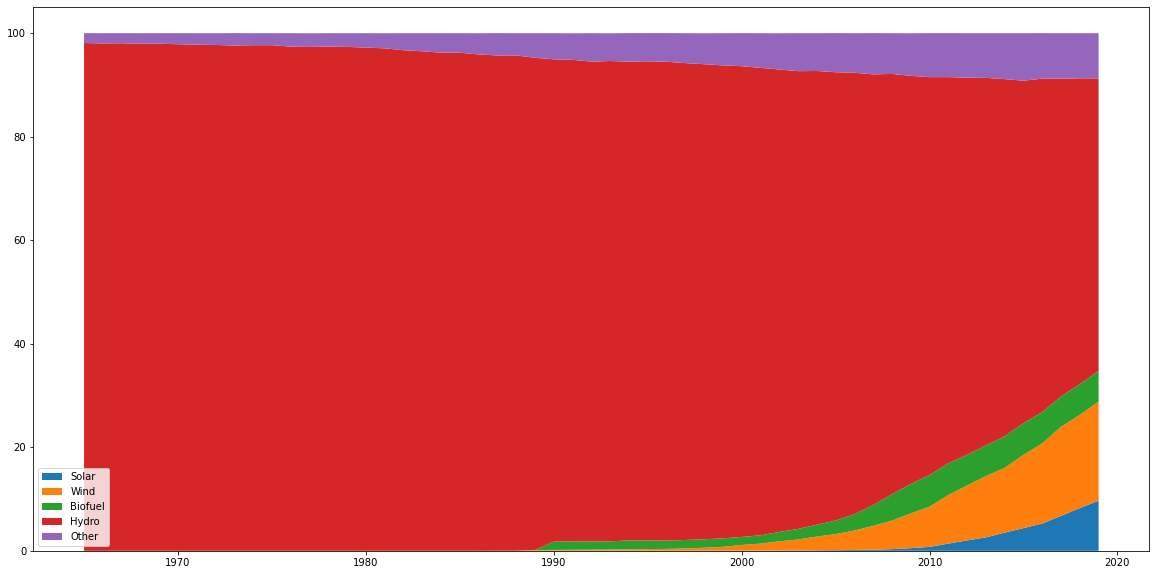

In [31]:
# Renewables stacked area chart.
X = world.year
Solar = ((world.solar_share_energy)/(world.renewables_share_energy))*100
Wind = ((world.wind_share_energy)/(world.renewables_share_energy))*100
Biofuel = ((world.biofuel_share_energy)/(world.renewables_share_energy))*100
Hydro = ((world.hydro_share_energy)/(world.renewables_share_energy))*100
Other = ((world.other_renewables_share_energy)/(world.renewables_share_energy))*100

plt.figure(figsize=(20,10))
plt.stackplot(X, Solar, Wind, Biofuel, Hydro, Other, labels=['Solar', 'Wind', 'Biofuel', 'Hydro', 'Other'])
plt.legend(loc='lower left')

In [32]:
world[world['year']==2019]['fossil_share_energy']

119    84.32
Name: fossil_share_energy, dtype: float64

In [33]:
world_65 = pd.DataFrame(world[(world['year'] >= 1965) & (world['year'] != 2020)]['year'])

In [34]:
world_65['month'] = '1'
world_65['day'] = '1'
world_65.head()

,year,month,day
65,1965,1,1
66,1966,1,1
67,1967,1,1
68,1968,1,1
69,1969,1,1


In [35]:
df = pd.DataFrame()
df['ds'] = pd.to_datetime(world_65, format = "%Y-%m-%d")
df['y'] = world[(world['year'] >= 1965)]['low_carbon_share_energy']
df = df.reset_index(drop = True)
#test = train[(train['ds'] > '2003-01-01') & (train['ds'] != '2020-01-01')]
#train = train[train['ds'] < '2004-01-01']
df.tail()

,ds,y
50,2015-01-01,14.161
51,2016-01-01,14.541
52,2017-01-01,14.877
53,2018-01-01,15.152
54,2019-01-01,15.677


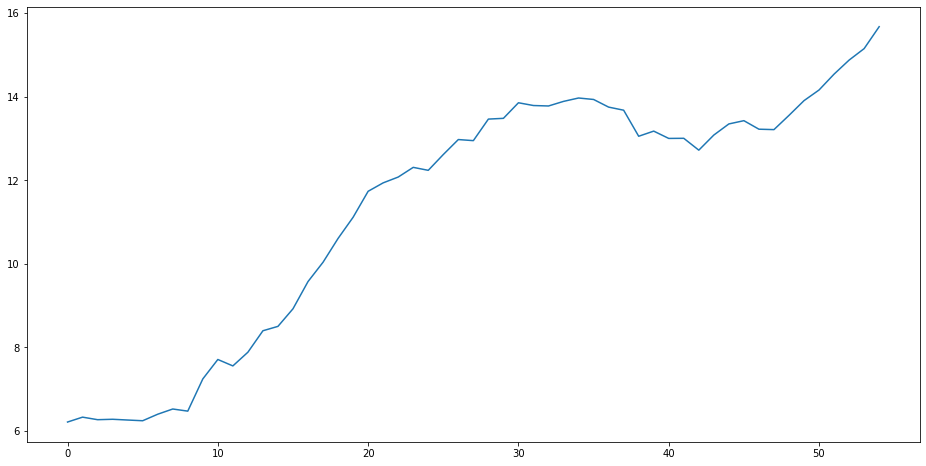

In [36]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['y'], label='Percentage of Low Carbon Energy Use')

## Linear Regression

In [37]:
year = {'years' :range(2020,2120,1)}
world_2020 = pd.DataFrame(data = year)

world_2020['month'] = '1'
world_2020['day'] = '1'
world_2020.head()

,years,month,day
0,2020,1,1
1,2021,1,1
2,2022,1,1
3,2023,1,1
4,2024,1,1


In [38]:
df2 = pd.DataFrame()
df2['ds'] = pd.to_datetime(world_2020, format = "%Y-%m-%d")
df2.head()

,ds
0,2020-01-01
1,2021-01-01
2,2022-01-01
3,2023-01-01
4,2024-01-01


In [39]:
X = np.array(world_65)
X2 = np.array(world_2020)

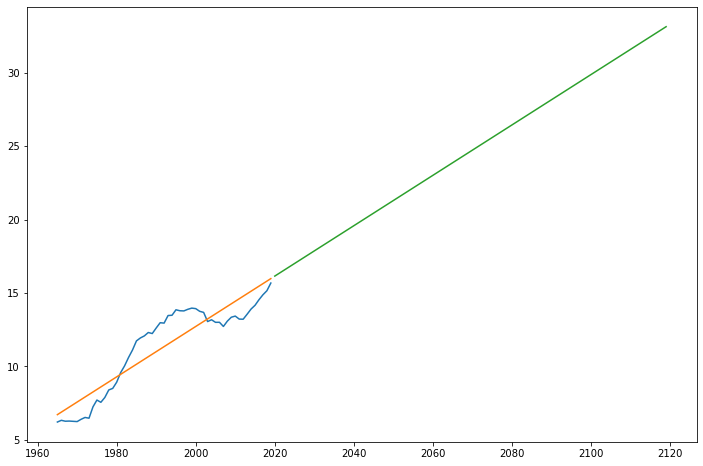

In [40]:
from sklearn.linear_model import LinearRegression
 
# fit the model
my_lr = LinearRegression()
my_lr.fit(X, df.y.values)
 
# predict on the same period
preds = my_lr.predict(X)
future = my_lr.predict(X2)
 
# plot what has been learned
plt.figure(figsize=(12,8))
plt.plot(df.ds, df.y.values)
plt.plot(df.ds, preds)
plt.plot(df2.ds, future)

In [41]:
print(future)

[16.15061818 16.32222273 16.49382727 16.66543182 16.83703636 17.00864091
 17.18024545 17.35185    17.52345455 17.69505909 17.86666364 18.03826818
 18.20987273 18.38147727 18.55308182 18.72468636 18.89629091 19.06789545
 19.2395     19.41110455 19.58270909 19.75431364 19.92591818 20.09752273
 20.26912727 20.44073182 20.61233636 20.78394091 20.95554545 21.12715
 21.29875455 21.47035909 21.64196364 21.81356818 21.98517273 22.15677727
 22.32838182 22.49998636 22.67159091 22.84319545 23.0148     23.18640455
 23.35800909 23.52961364 23.70121818 23.87282273 24.04442727 24.21603182
 24.38763636 24.55924091 24.73084545 24.90245    25.07405455 25.24565909
 25.41726364 25.58886818 25.76047273 25.93207727 26.10368182 26.27528636
 26.44689091 26.61849545 26.7901     26.96170455 27.13330909 27.30491364
 27.47651818 27.64812273 27.81972727 27.99133182 28.16293636 28.33454091
 28.50614545 28.67775    28.84935455 29.02095909 29.19256364 29.36416818
 29.53577273 29.70737727 29.87898182 30.05058636 30.22

## Random Forest

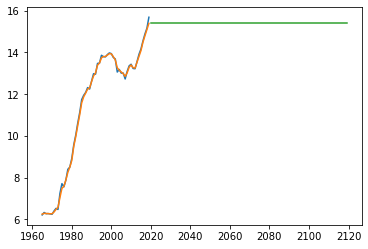

In [42]:
from sklearn.ensemble import RandomForestRegressor
 
# fit the model
my_rf = RandomForestRegressor()
my_rf.fit(X, df.y.values)
 
# predict on the same period
preds = my_rf.predict(X)
future = my_rf.predict(X2)
 
# plot what has been learned
plt.plot(df.ds, df.y.values)
plt.plot(df.ds, preds)
plt.plot(df2.ds, future)

## XGB

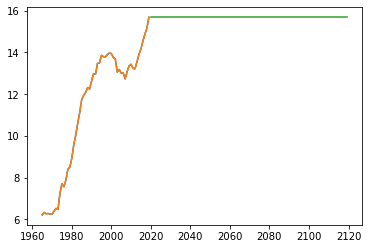

In [43]:
import xgboost as xgb
 
# fit the model
my_xgb = xgb.XGBRegressor()
my_xgb.fit(X, df.y.values)
 
# predict on the same period
preds = my_xgb.predict(X)
future = my_xgb.predict(X2)
 
# plot what has been learned
plt.plot(df.ds, df.y.values)
plt.plot(df.ds, preds)
plt.plot(df2.ds, future)